# Le but de cet exemple est de calculer, pour chaque décile de revenu, la part de leur consommation que les ménages accordent à chaque catégorie de bien. Les catégories suivent le niveau le plus agrégé de la nomenclature COICOP.

In [3]:
import pandas
import seaborn
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_bar
from openfisca_france_indirect_taxation.surveys import SurveyScenario

seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Construction de la dataframe et réalisation des graphiques

Profil de la consommation des ménages en 2000


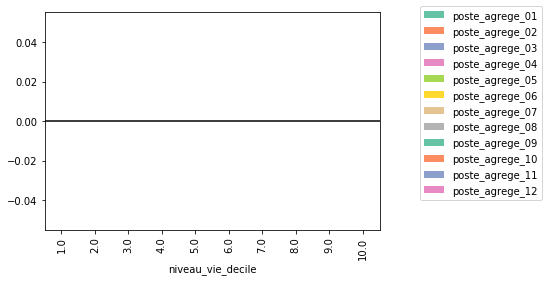

Profil de la consommation des ménages en 2005


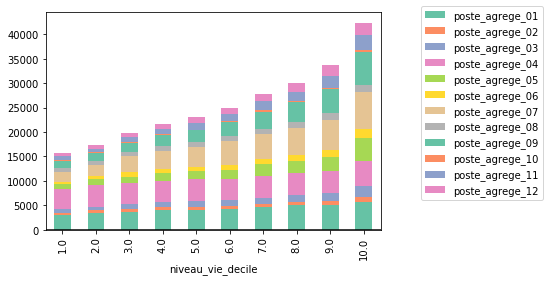

Profil de la consommation des ménages en 2011


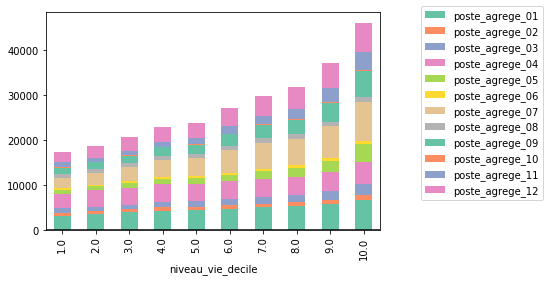

In [8]:
postes_agreges = ['poste_agrege_{}'.format(index) for index in
    ["0{}".format(i) for i in range(1, 10)] + ["10", "11", "12"]
    ]

simulated_variables = postes_agreges + ['depenses_tot']
for year in [2000, 2005, 2011]:
    survey_scenario = SurveyScenario.create(year = year)
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(
                values = [values], 
                columns = ['niveau_vie_decile'], 
                period = year,
                )
            ])
    df = pivot_table.T

    for poste_agrege in postes_agreges:
        df['part_{}'.format(poste_agrege)] = \
            df[poste_agrege] / df['depenses_tot']

    print('Profil de la consommation des ménages en {}'.format(year))
    graph_builder_bar(df[postes_agreges], stacked = True)
